In [1]:
from rdkit import Chem

In [2]:
lines = open('data/small.smi').readlines()
mols = [Chem.MolFromSmiles(x) for x in lines]

In [3]:
r_info = mols[0].GetRingInfo()

In [4]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import time
print(time.asctime())
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

Thu Feb 15 11:17:01 2018


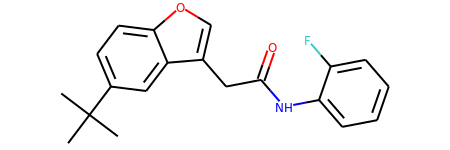

In [5]:
m = mols[0]
m

In [72]:
import itertools
# NOTE(LESWING) this version does not handle bridged rings correctly see version later
flatten = lambda l: [item for sublist in l for item in sublist]
r_info = m.GetRingInfo()

v1 = set()
bond_rings = set(flatten(r_info.BondRings()))
all_bonds = [x.GetIdx() for x in m.GetBonds()]
non_ring_bonds = set(all_bonds) - bond_rings
v1 = set([tuple(sorted(
        [m.GetBonds()[x].GetBeginAtom().GetIdx(), m.GetBonds()[x].GetEndAtom().GetIdx()])) 
          for x in non_ring_bonds])


v2 = set()
v2.update([tuple(sorted((x))) for x in r_info.AtomRings()])
to_merge = set()
for r1, r2 in itertools.product(v2, repeat=2):
    if r1 >= r2:
        continue
    intersection = set(r1).intersection(set(r2))
    if len(intersection) >= 3:
        to_merge.add((r1,r2))

for r1, r2 in to_merge:
    v2.remove(r1)
    v2.remove(r2)
    s1 = set()
    s1.update(r1)
    s1.update(r2)
    v2.add(s1)

all_clusters = set()
all_clusters.update(v1)
all_clusters.update(v2)
v0 = set()
for atom in m.GetAtoms():
    atom_id = atom.GetIdx()
    count = sum([
        atom_id in x for x in all_clusters
    ])
    if count >= 3:
        v0.add(atom_id)



TypeError: unhashable type: 'set'

In [7]:
def draw_cluster(m, atom_ids):
    colors = {}
    for atom in atom_ids:    
        colors[atom] = (1, 0, 0)
    drawer = rdMolDraw2D.MolDraw2DSVG(400,200)
    drawer.DrawMolecule(m,highlightAtoms=atom_ids,highlightAtomColors=colors)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace('svg:','')
    return SVG(svg)


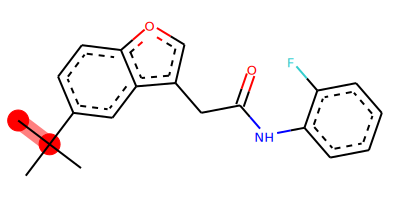

In [8]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(m)
draw_cluster(m, list(all_clusters)[0])

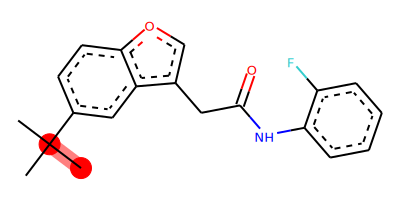

In [9]:
draw_cluster(m, list(all_clusters)[1])

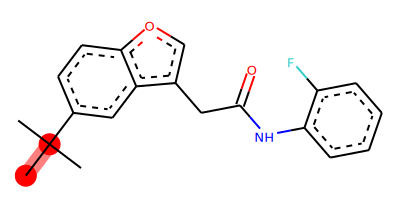

In [10]:
draw_cluster(m, list(all_clusters)[2])

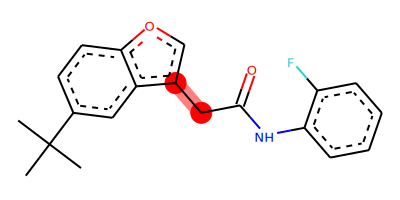

In [11]:
draw_cluster(m, list(all_clusters)[3])

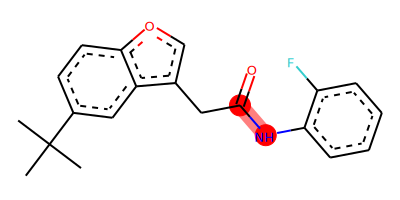

In [12]:
draw_cluster(m, list(all_clusters)[4])

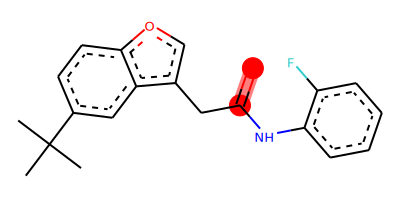

In [13]:
draw_cluster(m, list(all_clusters)[5])

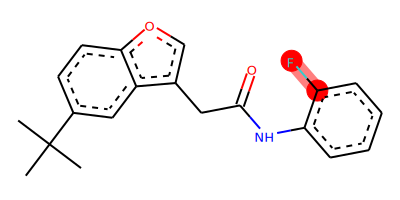

In [14]:
draw_cluster(m, list(all_clusters)[6])

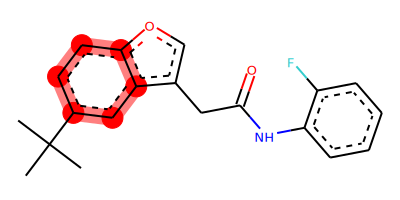

In [15]:
draw_cluster(m, list(all_clusters)[7])

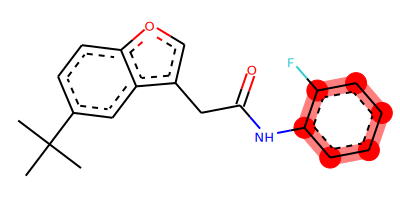

In [16]:
draw_cluster(m, list(all_clusters)[8])

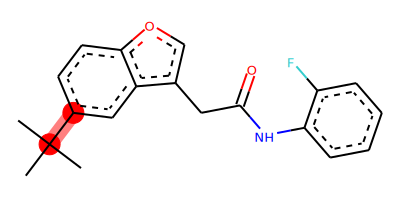

In [17]:
draw_cluster(m, list(all_clusters)[9])

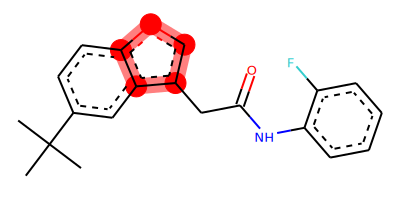

In [18]:
draw_cluster(m, list(all_clusters)[10])

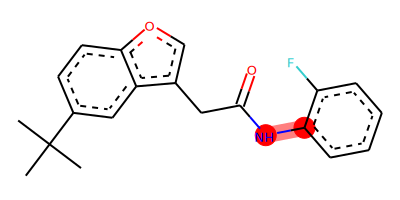

In [19]:
draw_cluster(m, list(all_clusters)[11])

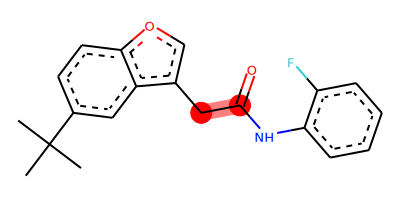

In [20]:
draw_cluster(m, list(all_clusters)[12])

In [21]:
from rdkit.Chem import EditableMol
def create_substructure(m, atom_ids):
    emol = EditableMol(m)
    to_remove_ids = [x.GetIdx() for x in m.GetAtoms()]
    for atom_id in atom_ids:
        to_remove_ids.remove(atom_id)
    to_remove_ids.reverse()
    for atom_id in to_remove_ids:
        emol.RemoveAtom(atom_id)
    return emol.GetMol()
    

In [23]:
frag = create_substructure(m, list(all_clusters)[10])

In [24]:
Chem.MolToSmiles(frag)

'c1ccoc1'

In [25]:
m = Chem.MolFromSmiles('Cc1c(Br)c(C(=O)NC(C)C23CC4CC(CC(C4)C2)C3)nn1C')

In [62]:
import itertools
import networkx as nx

flatten = lambda l: [item for sublist in l for item in sublist]
r_info = m.GetRingInfo()

v1 = set()
bond_rings = set(flatten(r_info.BondRings()))
all_bonds = [x.GetIdx() for x in m.GetBonds()]
non_ring_bonds = set(all_bonds) - bond_rings
v1 = set([tuple(sorted(
        [m.GetBonds()[x].GetBeginAtom().GetIdx(), m.GetBonds()[x].GetEndAtom().GetIdx()])) 
          for x in non_ring_bonds])


v2 = set()
v2.update([tuple(sorted((x))) for x in r_info.AtomRings()])
to_merge = set()
for r1, r2 in itertools.product(v2, repeat=2):
    if r1 >= r2:
        continue
    intersection = set(r1).intersection(set(r2))
    if len(intersection) >= 3:
        to_merge.add((r1,r2))

g = nx.Graph()
for f, t in to_merge:
    g.add_edge(f, t)
graphs = list(nx.connected_component_subgraphs(g))
to_merge = [list(x.nodes) for x in graphs]

for merge_keys in to_merge:
    s1 = set()
    for merge_key in merge_keys:
        v2.remove(merge_key)
        s1.update(merge_key)
    s1 = tuple(sorted(list(s1)))
    v2.add(s1)

all_clusters = set()
all_clusters.update(v1)
all_clusters.update(v2)
v0 = set()
for atom in m.GetAtoms():
    atom_id = atom.GetIdx()
    count = sum([
        atom_id in x for x in all_clusters
    ])
    if count >= 3:
        v0.add(atom_id)


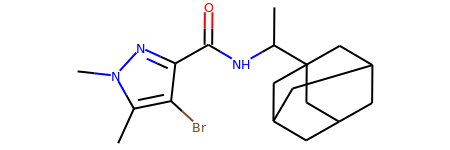

In [58]:
AllChem.Compute2DCoords(m)
m

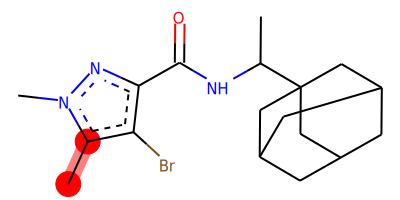

In [59]:
draw_cluster(m, list(all_clusters)[0])

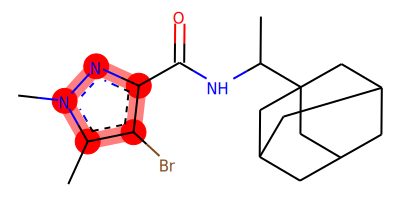

In [60]:
draw_cluster(m, list(all_clusters)[1])

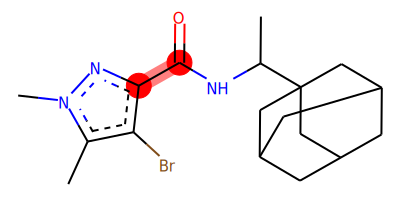

In [64]:
draw_cluster(m, list(all_clusters)[2])

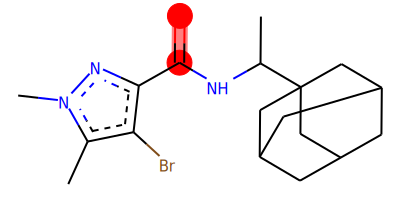

In [65]:
draw_cluster(m, list(all_clusters)[3])

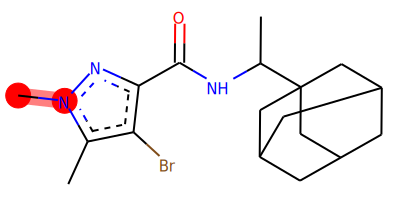

In [66]:
draw_cluster(m, list(all_clusters)[4])

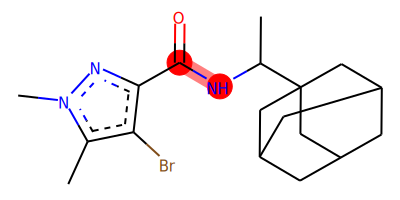

In [67]:
draw_cluster(m, list(all_clusters)[5])

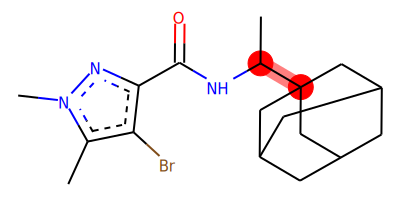

In [68]:
draw_cluster(m, list(all_clusters)[6])

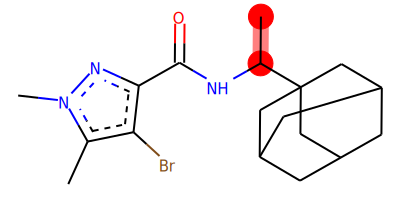

In [69]:
draw_cluster(m, list(all_clusters)[7])

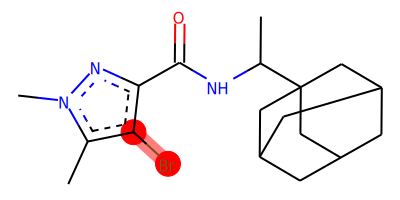

In [70]:
draw_cluster(m, list(all_clusters)[8])

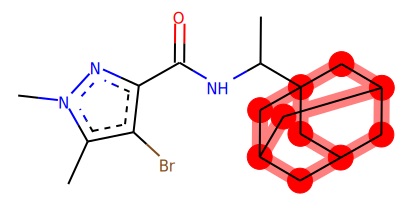

In [71]:
draw_cluster(m, list(all_clusters)[9])

In [75]:
list(g.nodes())

[(10, 11, 12, 13, 14, 19),
 (10, 11, 12, 16, 17, 18),
 (10, 14, 15, 16, 18, 19),
 (12, 13, 14, 15, 16, 17)]

In [97]:
import json
fragments = json.load(open('data/fragments.txt'))

In [106]:
mols = [Chem.MolFromSmiles(x, sanitize=False) for x in fragments if x is not None]
neutral_smiles = set()
neutral_mols = []
for mol in mols:
    if mol is None:
        continue
    for atom in mol.GetAtoms():
        atom.SetFormalCharge(0)
    neutral_mols.append(mol)
    neutral_smiles.add(Chem.MolToSmiles(mol))



In [107]:
neutral_mols

 ...]

In [108]:
mols

 ...]

In [110]:
len(neutral_smile780s)

1859

In [85]:
with open('data/to_ld_fragments.csv', 'w') as fout:
    fout.write('smiles\n')
    for frag in fragments:
        fout.write("%s\n" % frag)
        

In [86]:
m1 = Chem.MolFromSmiles(fragments[0])

In [87]:
atom = m1.GetAtoms()[0]

In [88]:
atom.SetFormalCharge(0)

In [4]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import time
print(time.asctime())
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import json
from rdkit import Chem
m = json.loads(open('data/frag_with_aromatic.json').read())
mols = [Chem.MolFromSmiles(x, sanitize=False) for x in m]

Mon Feb 19 16:28:05 2018


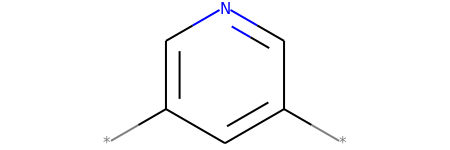

In [16]:
mols[11]

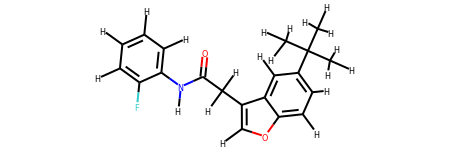

In [23]:
my_mol = open('data/250k_rndm_zinc_drugs_clean.smi').readlines()[0]
my_mol = Chem.MolFromSmiles(my_mol)
my_mol = Chem.AddHs(my_mol)
my_mol

In [28]:
fragments = json.loads(open('data/frag_with_aromatic.json').read())
fragments = [Chem.MolFromSmiles(x, sanitize=False) for x in fragments]

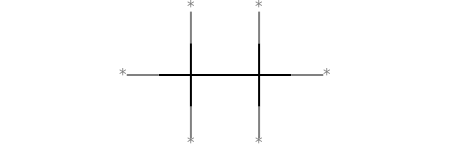

In [47]:
fragments[0]

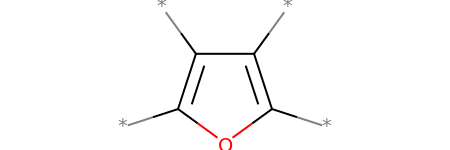

In [48]:
fragments[1]

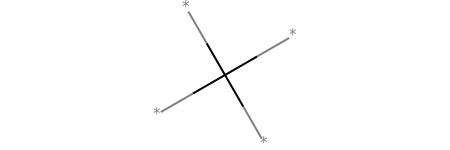

In [49]:
fragments[2]

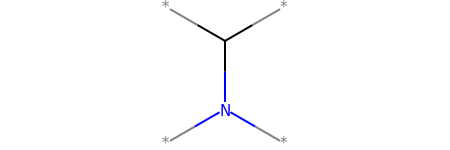

In [50]:
fragments[3]

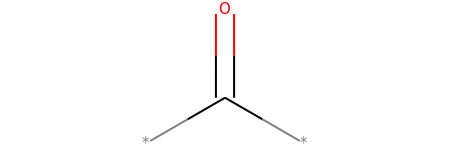

In [51]:
fragments[4]

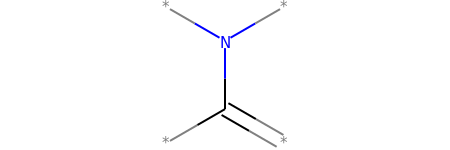

In [52]:
fragments[5]

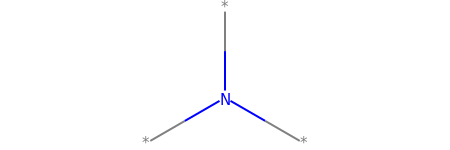

In [53]:
fragments[6]

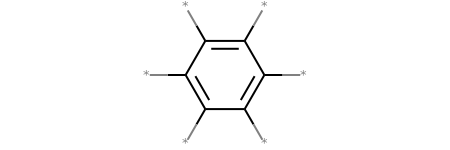

In [54]:
fragments[7]

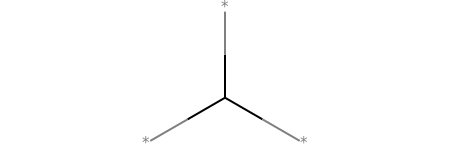

In [55]:
fragments[8]

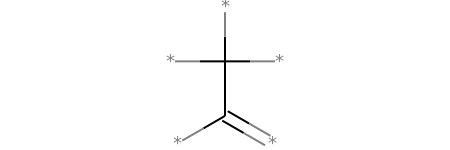

In [56]:
fragments[9]

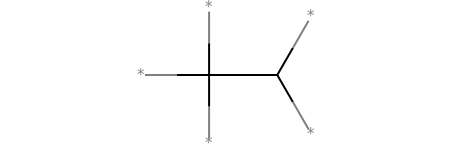

In [57]:
fragments[10]

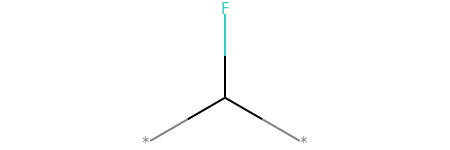

In [58]:
fragments[11]

In [59]:
fragments = json.loads(open('data/frag_with_aromatic.json').read())
fragments = [Chem.MolFromSmiles(x, sanitize=False) for x in fragments]

In [62]:
from rdkit.Chem import Descriptors
for mol in fragments:
    try:
        Chem.SanitizeMol(mol)
    except:
        pass
weights = [Descriptors.MolWt(x) for x in fragments]
print(len(set(weights)))

211


RDKit ERROR: [16:31:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 162 in file /opt/conda/conda-bld/rdkit_1516517867023/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [16:32:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 162 in file /opt/conda/conda-bld/rdkit_1516517867023/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [16:32:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 162 in file /opt/conda/co

In [68]:
weights = sorted(zip(weights, fragments), key=lambda x: x[0])

In [69]:
weights[:10]

[(12.011, <rdkit.Chem.rdchem.Mol at 0x7fe7e80a5710>),
 (12.011, <rdkit.Chem.rdchem.Mol at 0x7fe7e802c620>),
 (12.011, <rdkit.Chem.rdchem.Mol at 0x7fe7e8031b20>),
 (12.011, <rdkit.Chem.rdchem.Mol at 0x7fe7e8033ad0>),
 (13.018999999999998, <rdkit.Chem.rdchem.Mol at 0x7fe7e80333a0>),
 (14.007, <rdkit.Chem.rdchem.Mol at 0x7fe7e8092800>),
 (14.007, <rdkit.Chem.rdchem.Mol at 0x7fe7e80949e0>),
 (14.007, <rdkit.Chem.rdchem.Mol at 0x7fe7e8095bc0>),
 (14.007, <rdkit.Chem.rdchem.Mol at 0x7fe7e8096530>),
 (14.007, <rdkit.Chem.rdchem.Mol at 0x7fe7e802ad50>)]

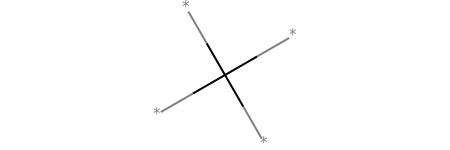

In [71]:
weights[0][1]

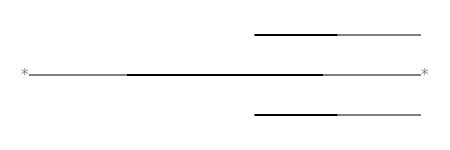

In [74]:
weights[1][1]

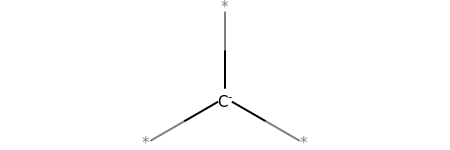

In [75]:
weights[2][1]

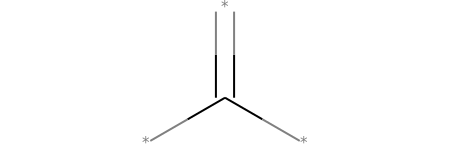

In [76]:
weights[3][1]

[*]c([*])[*]


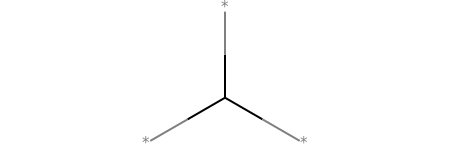

In [79]:
print(Chem.MolToSmiles(weights[4][1]))
weights[4][1]

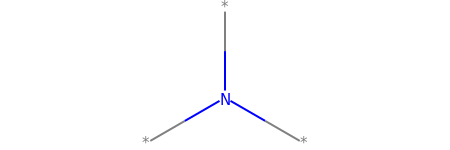

In [80]:
weights[5][1]

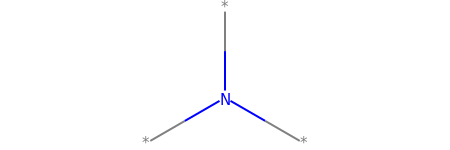

In [81]:
weights[6][1]

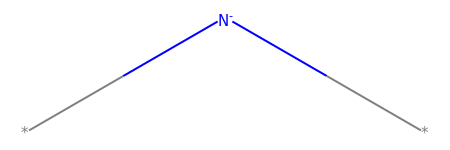

In [82]:
weights[7][1]

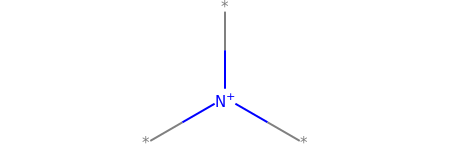

In [83]:
weights[8][1]

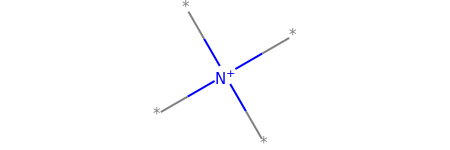

In [84]:
weights[9][1]

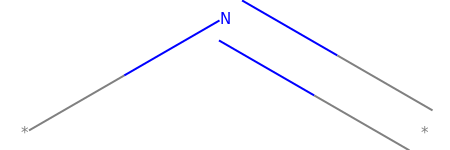

In [85]:
weights[10][1]

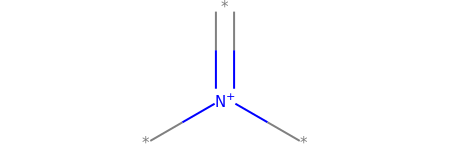

In [86]:
weights[11][1]

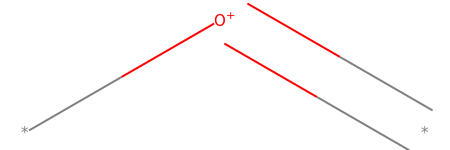

In [87]:
weights[12][1]

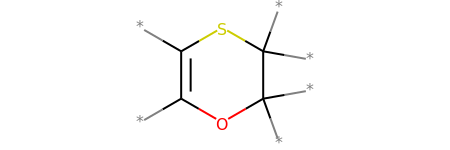

In [95]:
weights[-300][1]

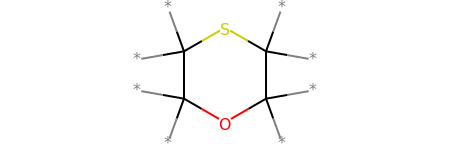

In [96]:
weights[-299][1]

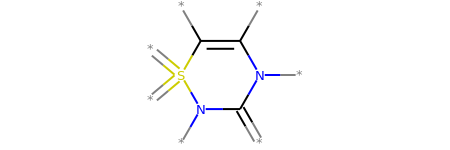

In [97]:
weights[-298][1]

In [98]:
len(set([x[0] for x in weights]))

211

In [99]:
len(fragments)

1917

In [103]:
def has_ring(x):
    r_info = x.GetRingInfo()
    return len(r_info.BondRings()) > 0

In [104]:
has_ring(fragments[-1])

True

In [105]:
has_ring(fragments[0])

True

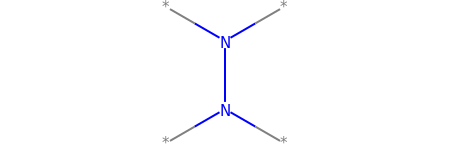

In [110]:
i = 0
while has_ring(fragments[i]):
    i+=1
fragments[i]

In [117]:
from rdkit.Chem import EditableMol
def remove_any_atom_bonds(m):
    if not has_ring(m):
        return m
    emol = EditableMol(Chem.MolFromSmiles(""))
    atom_map = {}
    for atom in m.GetAtoms():
        if atom.GetAtomicNum() == 0:
            continue
        new_idx = emol.AddAtom(Chem.Atom(atom.GetAtomicNum()))
        atom_map[atom.GetIdx()] = new_idx
    for bond in m.GetBonds():
        start, end = bond.GetBeginAtom(), bond.GetEndAtom()
        if start.GetAtomicNum() == 0:
            continue
        if end.GetAtomicNum() == 0:
            continue
        start, end = atom_map[start.GetIdx()], atom_map[end.GetIdx()]
        emol.AddBond(start, end, bond.GetBondType())
    return emol.GetMol()
    
        

In [133]:
rings_only = [remove_any_atom_bonds(x) for x in fragments]
rings_only_smiles = [Chem.MolToSmiles(x) for x in rings_only]
rings_only = [Chem.MolFromSmiles(x, sanitize=False) for x in rings_only_smiles]
len(set(rings_only_smiles))

581

In [134]:
def karl_weight(m):
    total = 0
    for atom in m.GetAtoms():
        total += atom.GetAtomicNum()
    return total
weights = [karl_weight(m) for m in rings_only]

In [137]:
l = sorted(zip(weights, rings_only), key=lambda x: x[0])

In [141]:
l_1 = list(filter(lambda x: x[0] == 32, l))

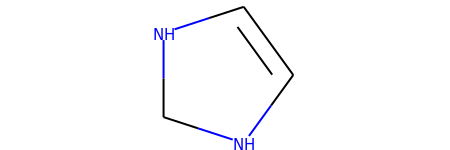

In [143]:
l_1[0][1]

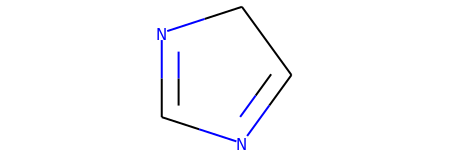

In [145]:
l_1[1][1]

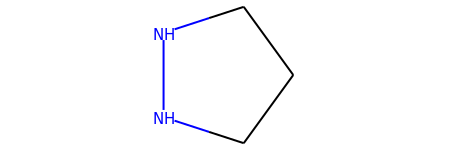

In [154]:
l_1[10][1]

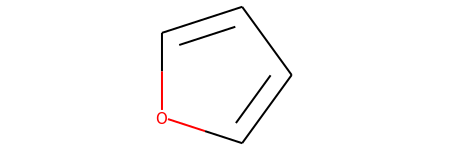

In [155]:
l_1[11][1]

In [156]:
substructure_smiles = rings_only_smiles
with open('data/frag_reduced.json', 'w') as fout:
    fout.write(json.dumps(list(substructure_smiles)))
with open('data/frag_reduced.csv', 'w') as fout:
    fout.write('smiles\n')
    for line in substructure_smiles:
        fout.write("%s\n" % line)